<a href="https://colab.research.google.com/github/nihalks-30/Denoising-Dirty-Documents-/blob/main/Denoising_dirty_documents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()
#Get json file from https://www.kaggle.com/c/denoising-dirty-documents/data

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nihalks2004","key":"a8285f8ab383c332899d980963c60784"}'}

In [3]:
import shutil
import os

# Create the directory if it doesn't exist
os.makedirs("/root/.kaggle", exist_ok=True)

# Move the kaggle.json file (uploaded to current directory) to the correct location
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set the right permissions (read & write for the owner only)
os.chmod("/root/.kaggle/kaggle.json", 600)


In [4]:
!pip install -q kaggle


In [5]:
!kaggle competitions download -c denoising-dirty-documents


  0% 0.00/35.7M [00:00<?, ?B/s]
100% 35.7M/35.7M [00:00<00:00, 800MB/s]


In [6]:
!unzip -q denoising-dirty-documents.zip -d denoising_dirty_documents


In [7]:
!pip uninstall -y kaggle


Found existing installation: kaggle 1.7.4.5
Uninstalling kaggle-1.7.4.5:
  Successfully uninstalled kaggle-1.7.4.5


In [8]:
!pip install kaggle==1.5.13


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77711 sha256=e4362b87590b1d832dc902dc16e64ca53918bb700297638d14b527923f5c3dad
  Stored in directory: /root/.cache/pip/wheels/3a/a1/b2/6ae87ab801289eabd078a52cc8167e232e98f09b0e6cd2ca48
Successfully built kaggle


In [9]:
!rm -f denoising-dirty-documents.zip


In [10]:

!kaggle competitions download -c denoising-dirty-documents


 42% 15.0M/35.7M [00:00<00:00, 76.4MB/s]
100% 35.7M/35.7M [00:00<00:00, 122MB/s] 


In [11]:
!unzip -q denoising-dirty-documents.zip -d denoising_dirty_documents


replace denoising_dirty_documents/sampleSubmission.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace denoising_dirty_documents/test.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace denoising_dirty_documents/train.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace denoising_dirty_documents/train_cleaned.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [12]:
import os
os.listdir("denoising_dirty_documents")


['train.zip', 'test.zip', 'train_cleaned.zip', 'sampleSubmission.csv.zip']

In [13]:
!unzip -q denoising_dirty_documents/train.zip -d denoising_dirty_documents/train
!unzip -q denoising_dirty_documents/test.zip -d denoising_dirty_documents/test


In [14]:
import shutil
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split

#import openCV
import cv2
from PIL import Image

#importing tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten,UpSampling2D, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import applications, optimizers
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

Found 144 images.


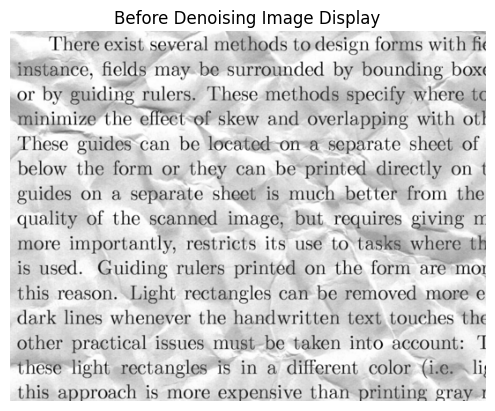

In [15]:

import matplotlib.image as mpimg

train_dir = "denoising_dirty_documents/train/train"

image_files = [f for f in os.listdir(train_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

print(f"Found {len(image_files)} images.")

if image_files:
    image_path = os.path.join(train_dir, image_files[0])
    img = mpimg.imread(image_path)
    plt.imshow(img, cmap='gray')
    plt.title('Before Denoising Image Display')
    plt.axis('off')
    plt.show()
else:
    print("No images found in the directory.")


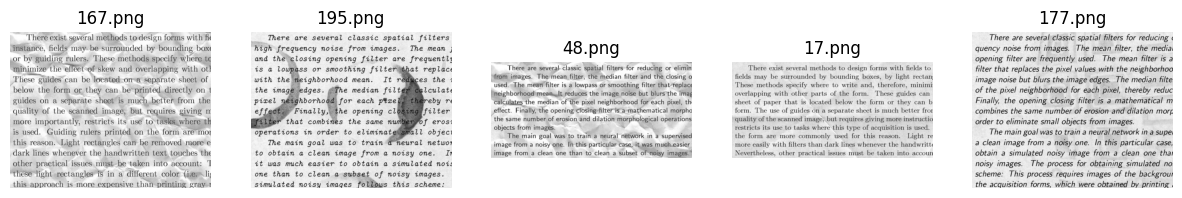

In [16]:
num_images_to_show = 5

plt.figure(figsize=(15, 5))
for i in range(num_images_to_show):
    img_path = os.path.join(train_dir, image_files[i])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(image_files[i])
plt.show()


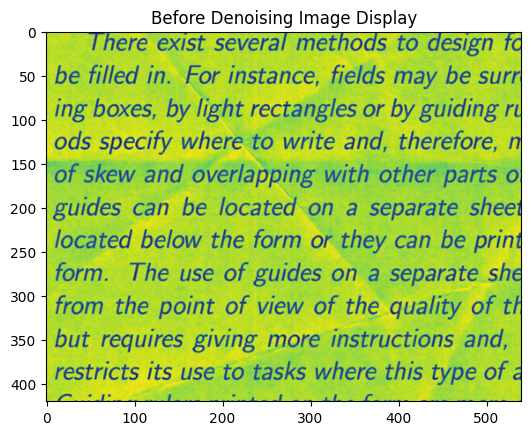

In [17]:
img=mpimg.imread('denoising_dirty_documents/train/train/101.png')
imgplot = plt.imshow(img)
plt.title('Before Denoising Image Display')
plt.show()

In [18]:
!unzip -q denoising_dirty_documents/train_cleaned.zip -d denoising_dirty_documents/train/


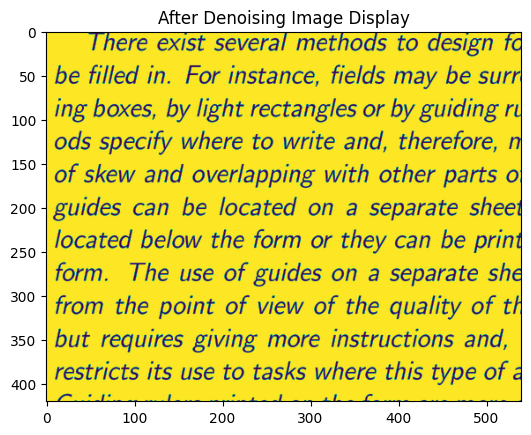

In [19]:
import matplotlib.image as mpimg
img=mpimg.imread('denoising_dirty_documents/train/train_cleaned/101.png')
imgplot = plt.imshow(img)
plt.title('After Denoising Image Display')
plt.show()

DATA SEGGREGATION

In [20]:
x_train= []

path= 'denoising_dirty_documents/train/train/'
for i in os.listdir(path= path):
  x_train.append((path+str(i)))
print('Total images in train dataset: ',len(x_train))

y_train= []

path= 'denoising_dirty_documents/train/train_cleaned/'
for i in os.listdir(path= path):
  y_train.append((path+str(i)))

print('Total images in train_cleaned dataset: ',len(y_train))

test= []

path= 'denoising_dirty_documents/test/test/'
for i in os.listdir(path= path):
  test.append((path+str(i)))

print('Total images in test dataset: ',len(test))

Total images in train dataset:  144
Total images in train_cleaned dataset:  144
Total images in test dataset:  72


In [21]:
x_train[:5]


['denoising_dirty_documents/train/train/167.png',
 'denoising_dirty_documents/train/train/195.png',
 'denoising_dirty_documents/train/train/48.png',
 'denoising_dirty_documents/train/train/17.png',
 'denoising_dirty_documents/train/train/177.png']

In [22]:
for i in x_train[:5]:
  img = cv2.imread(i)
  height, width, channels = img.shape
  print(img.shape)

(420, 540, 3)
(420, 540, 3)
(258, 540, 3)
(258, 540, 3)
(420, 540, 3)


In [23]:
ht=[]
wd= []
for i in x_train:
  img = cv2.imread(i)
  height, width, channels = img.shape
  ht.append(img.shape[0])
  wd.append(img.shape[1])

print('Max Height of image in x_train', max(ht))
print('Min Height of image in x_train', min(ht))
print('Max Width of image in x_train', max(wd))
print('Min Width of image in x_train', max(wd))

Max Height of image in x_train 420
Min Height of image in x_train 258
Max Width of image in x_train 540
Min Width of image in x_train 540


In [24]:
#we see the minimum height of image is 258 and width remains the same and hence we convert all the heights into 258.
#Resizing and rescaling
new_shape = (258, 540, 1)
def load_images(path):
    image_list = []
    for i in path:
        img = cv2.imread(i,0) # read grayscale image
        img = cv2.resize(img, (new_shape[1], new_shape[0]))
        img = img / 255.
        img = np.expand_dims(img, axis=-1) # we get channel as 1 in output.
        image_list.append(img)
    return image_list

In [25]:
new_x_train= load_images(x_train)
new_y_train= load_images(y_train)
new_test= load_images(test)

new_x_train[0].shape

(258, 540, 1)

In [26]:
new_x_train= np.array(new_x_train)
new_y_train= np.array(new_y_train)
new_test= np.array(new_test)

print('Shape of Single image:',new_x_train[0].shape)          #converted to array as lists are not accepted in conv
print('Shape of All images:',new_x_train.shape)

Shape of Single image: (258, 540, 1)
Shape of All images: (144, 258, 540, 1)


In [27]:
x_tr, x_val, y_tr, y_val = train_test_split(new_x_train, new_y_train, test_size=0.3, random_state=42)
print('Train data:',x_tr.shape)
print('Validation data:', x_val.shape)

Train data: (100, 258, 540, 1)
Validation data: (44, 258, 540, 1)


Encoder Decoder Model

In [28]:
#Encoder
model= Sequential()
model.add(Conv2D(filters= 128, kernel_size= (3,3), activation='relu', padding='same', name='Conv1', input_shape= new_shape))
model.add(BatchNormalization(name= 'BN1'))
model.add(MaxPool2D((2,2), padding='same', name='pool1'))

#Decoder
model.add(Conv2D(filters= 128, kernel_size= (3,3), activation='relu', padding='same', name='Conv2'))
model.add(UpSampling2D((2,2), name='upsample1'))
model.add(Conv2D(filters= 1, kernel_size= (3,3), activation='sigmoid', padding='same', name='Conv3'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 258, 540, 128)  │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN1 (BatchNormalization)        │ (None, 258, 540, 128)  │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 129, 270, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 129, 270, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ upsample1 (UpSampling2D)        │ (None, 258, 540, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 258, 540, 1)    │         1,153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,529 (588.00 KB)

 Trainable params: 150,273 (587.00 KB)

 Non-trainable params: 256 (1.00 KB)

In [29]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics= ['RootMeanSquaredError'])
history= model.fit(x= x_tr, y= y_tr, batch_size= 8, epochs= 30, validation_data= (x_val, y_val), )

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 223s 17s/step - RootMeanSquaredError: 0.2914 - loss: 0.0895 - val_RootMeanSquaredError: 0.2428 - val_loss: 0.0590
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 222s 17s/step - RootMeanSquaredError: 0.1338 - loss: 0.0179 - val_RootMeanSquaredError: 0.2399 - val_loss: 0.0575
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 267s 17s/step - RootMeanSquaredError: 0.0980 - loss: 0.0096 - val_RootMeanSquaredError: 0.2296 - val_loss: 0.0527
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 227s 18s/step - RootMeanSquaredError: 0.0753 - loss: 0.0057 - val_RootMeanSquaredError: 0.2248 - val_loss: 0.0505
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 272s 18s/step - RootMeanSquaredError: 0.0647 - loss: 0.0042 - val_RootMeanSquaredError: 0.2194 - val_loss: 0.0481
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 227s 18s/step - RootMeanSquaredError: 0.0587 - loss: 0.0034 - val_RootMeanSquaredError: 0.2128 - val_loss: 0.0453
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 286s 20s/step - RootMeanSquaredError: 0.0555 - los

In [30]:
predictions= model.predict( x= new_test)
predictions.shape

3/3 ━━━━━━━━━━━━━━━━━━━━ 29s 8s/step


(72, 258, 540, 1)

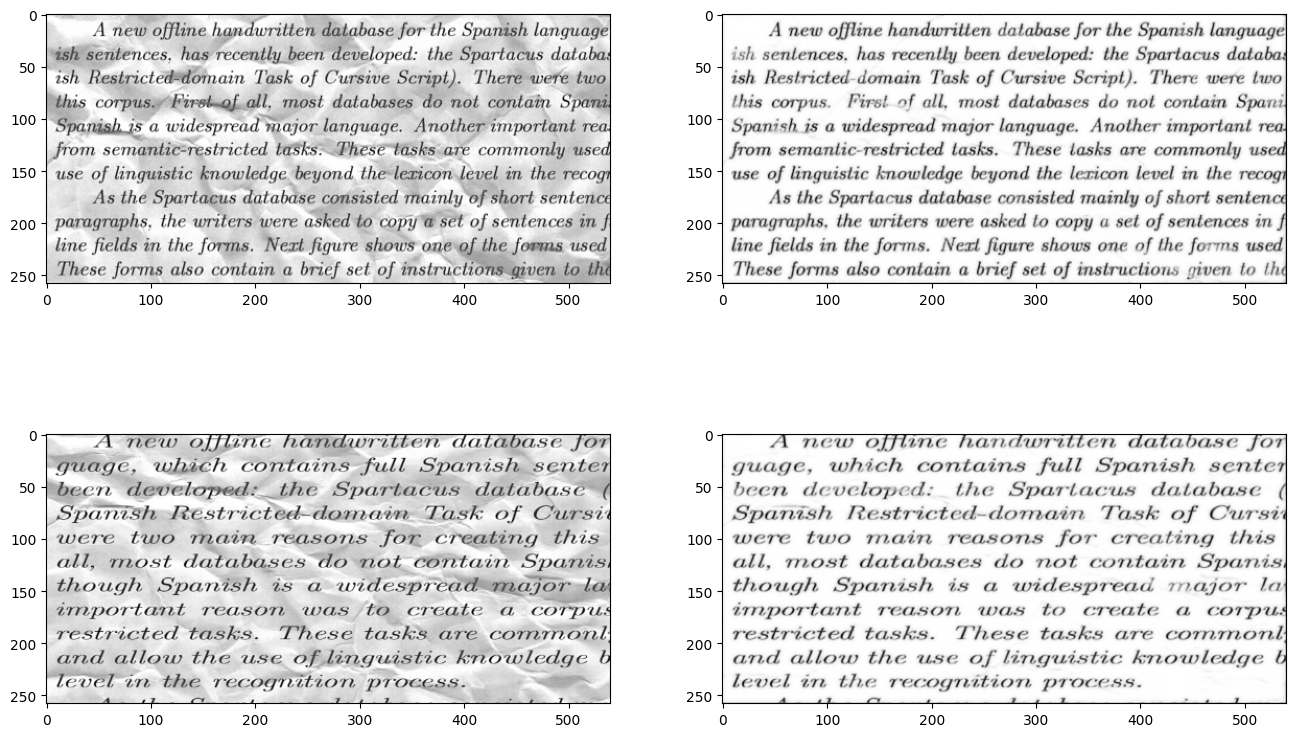

In [34]:
#checking sample image
f, ax = plt.subplots(2,2, figsize=(16,10))

# we need to reshape the image removing the channel as we are using 'plt.imshow'.
ax[0,0].imshow(new_test[0].reshape(258, 540), cmap='gray', )
ax[0,1].imshow(predictions[0].reshape(258, 540), cmap='gray')
ax[1,0].imshow(new_test[1].reshape(258, 540), cmap='gray')
ax[1,1].imshow(predictions[1].reshape(258, 540), cmap='gray')
plt.show()